### Отслеживание влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике для выявления на ранней стадии студентов, находящихся в группе риска.
Переменные, которые содержит датасет:

0. __school__ — аббревиатура школы, в которой учится ученик
2. __sex__ — пол ученика ('F' - женский, 'M' - мужской)
3. __age__ — возраст ученика (от 15 до 22)
4. __address__ — тип адреса ученика ('U' - городской, 'R' - за городом)
5. __famsize__ — размер семьи('LE3' <= 3, 'GT3' >3)
6. __Pstatus__ — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. __Medu__ — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. __Fedu__ — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. __Mjob__ — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. __Fjob__ — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. __reason__ — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. __guardian__ — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. __traveltime__ — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. __studytime__ — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. __failures__ — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. __schoolsup__ — дополнительная образовательная поддержка (yes или no)
17. __famsup__ — семейная образовательная поддержка (yes или no)
18. __paid__ — дополнительные платные занятия по математике (yes или no)
19. __activities__ — дополнительные внеучебные занятия (yes или no)
20. __nursery__ — посещал детский сад (yes или no)
21. __higher__ — хочет получить высшее образование (yes или no)
22. __internet__ — наличие интернета дома (yes или no)
23. __romantic__ — в романтических отношениях (yes или no)
24. __famrel__ — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. __freetime__ — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. __goout__ — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. __health__ — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. __absences__ — количество пропущенных занятий
29. __score__ — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

%matplotlib inline

In [2]:
students = pd.read_csv('stud_math.xls')

display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Целевое значение в данном случае - результаты госэкзамена. Данный стобец содержит пропуски. Целесобразно сразу исключить строки с пропусками по целевому значению из набора данных

##  Столбец scope - результаты теста

In [3]:
display(pd.DataFrame(students['score'].value_counts()))
pd.DataFrame(students['score']).info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [4]:
students = students[[False if pd.isnull(x) else True for x in students.score]]

In [5]:
display(pd.DataFrame(students['score'].value_counts()))
pd.DataFrame(students['score']).info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [6]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

## Столбец 'studytime, granular'

In [7]:
display(pd.DataFrame(students['studytime, granular'].value_counts()))
pd.DataFrame(students['studytime, granular']).info()

,"studytime, granular"
-6.0,189
-3.0,103
-9.0,63
-12.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


В данных наличиствует столбец "studytime, granular", описания которого нет. В данном столбце размещены числовые данные: -3, -6, -9, -12, а также 7 пропущенных значений.
Смысл данного столбца неизвестен, поэтому из дальнейшего рассмотрения исключается

In [8]:
del students['studytime, granular']
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Столбец 'school', 'sex', 'age'

Данные столбцы не содержат пропусков. Необходимо проверить, нет ли неправильно заполненных строк.

In [9]:
display(pd.DataFrame(students['school'].value_counts()))
display(pd.DataFrame(students['sex'].value_counts()))
display(pd.DataFrame(students['age'].value_counts()))

,school
GP,344
MS,45


,sex
F,204
M,185


,age
16,103
17,98
15,82
18,80
19,21
20,3
22,1
21,1


В данной выборке рассматриваются ученики только двух школ, пропущенных значений нет
В выборе у всех студентов указан пол.
В выборке нет пропущенных значений возраста, а также все ученики находятся в заданном диапазоне рассмотрения. Но преимущественный возраст студентов - до 20

## Столбцы, содержащие качественные показатели и имеющие пропуски

В данных столбцах заменим пропущенные значения на 'no_data' 
* [3] address — тип адреса ученика ('U' - городской, 'R' - за городом)
* [4] famsize — размер семьи('LE3' <= 3, 'GT3' >3)
* [5] Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
* [15] schoolsup — дополнительная образовательная поддержка (yes или no)
* [16] famsup — семейная образовательная поддержка (yes или no)
* [17] paid — дополнительные платные занятия по математике (yes или no)
* [18]activities — дополнительные внеучебные занятия (yes или no)
* [19] nursery — посещал детский сад (yes или no)
* [20] higher — хочет получить высшее образование (yes или no)
* [21] internet — наличие интернета дома (yes или no)
* [22] romantic — в романтических отношениях (yes или no)

В следующих столбцах есть вариант ответа 'other'. Укажем это вместо всех не указанных значений

* [8] Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* [9] Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
* [10] reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
* [11] guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [10]:
count_no_data = dict()
for name_colomn in students.columns[[3, 4, 5, 15, 16, 17, 18, 19, 20, 21, 22]]:
    display(pd.DataFrame(students[name_colomn].value_counts()))
    count_no_data[name_colomn] = students[pd.isnull(students[name_colomn])].age.count()\
        + students[pd.isna(students[name_colomn])].age.count()
    students[name_colomn] = students[name_colomn].apply(
        lambda x: 'no_data' if pd.isnull(x) or pd.isna(x) else x)
    display(pd.DataFrame(students[name_colomn].value_counts()))
    count_no_data[name_colomn] = students[students[name_colomn]
                                          == 'no_data'].age.count()

for name_colomn in students.columns[[8, 9, 10, 11]]:
    display(pd.DataFrame(students[name_colomn].value_counts()))
    count_no_data[name_colomn] = students[pd.isnull(students[name_colomn])].age.count()\
        + students[pd.isna(students[name_colomn])].age.count()
    students[name_colomn] = students[name_colomn].apply(
        lambda x: 'other' if pd.isnull(x) or pd.isna(x) else x)
    display(pd.DataFrame(students[name_colomn].value_counts()))


display(count_no_data)

,address
U,291
R,83


,address
U,291
R,83
no_data,15


,famsize
GT3,255
LE3,107


,famsize
GT3,255
LE3,107
no_data,27


,Pstatus
T,308
A,36


,Pstatus
T,308
no_data,45
A,36


,schoolsup
no,331
yes,49


,schoolsup
no,331
yes,49
no_data,9


,famsup
yes,216
no,135


,famsup
yes,216
no,135
no_data,38


,paid
no,197
yes,153


,paid
no,197
yes,153
no_data,39


,activities
yes,192
no,183


,activities
yes,192
no,183
no_data,14


,nursery
yes,297
no,77


,nursery
yes,297
no,77
no_data,15


,higher
yes,350
no,19


,higher
yes,350
no_data,20
no,19


,internet
yes,300
no,55


,internet
yes,300
no,55
no_data,34


,romantic
no,235
yes,123


,romantic
no,235
yes,123
no_data,31


,Mjob
other,127
services,98
at_home,58
teacher,55
health,32


,Mjob
other,146
services,98
at_home,58
teacher,55
health,32


,Fjob
other,194
services,99
teacher,29
at_home,16
health,15


,Fjob
other,230
services,99
teacher,29
at_home,16
health,15


,reason
course,135
reputation,102
home,101
other,34


,reason
course,135
reputation,102
home,101
other,51


,guardian
mother,248
father,86
other,24


,guardian
mother,248
father,86
other,55


{'address': 15,
 'famsize': 27,
 'Pstatus': 45,
 'schoolsup': 9,
 'famsup': 38,
 'paid': 39,
 'activities': 14,
 'nursery': 15,
 'higher': 20,
 'internet': 34,
 'romantic': 31,
 'Mjob': 38,
 'Fjob': 72,
 'reason': 34,
 'guardian': 62}

## Столбцы, имеющие качественные показатели, но выраженные числовыми значениями


[6] Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
[7] Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)  
[12] traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)  
[13] studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)  
[14] failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)  
[23] famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)  
[24] freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)  
[25] goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)  
[26] health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)  


In [11]:
for name_colomn in students.columns[[6, 7, 12, 13, 14, 23, 24, 25, 26]]:
    students = students[[False if pd.isnull(x) else True for x in students[name_colomn]]]

students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      272 non-null    object 
 1   sex         272 non-null    object 
 2   age         272 non-null    int64  
 3   address     272 non-null    object 
 4   famsize     272 non-null    object 
 5   Pstatus     272 non-null    object 
 6   Medu        272 non-null    float64
 7   Fedu        272 non-null    float64
 8   Mjob        272 non-null    object 
 9   Fjob        272 non-null    object 
 10  reason      272 non-null    object 
 11  guardian    272 non-null    object 
 12  traveltime  272 non-null    float64
 13  studytime   272 non-null    float64
 14  failures    272 non-null    float64
 15  schoolsup   272 non-null    object 
 16  famsup      272 non-null    object 
 17  paid        272 non-null    object 
 18  activities  272 non-null    object 
 19  nursery     272 non-null    o

## Столбец absences — количество пропущенных занятий

In [12]:
display(pd.DataFrame(students['absences'].value_counts()))
pd.DataFrame(students['absences']).info()

,absences
0.0,77
4.0,41
2.0,38
6.0,19
8.0,16
10.0,12
14.0,8
12.0,8
16.0,7
3.0,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  263 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


Выборка содержит 9 пропущенных значений. Заменим пропущенные значения на значения моды

In [13]:
mode_absences = 0.0
students['absences'] = students['absences'].apply(
    lambda x: mode_absences if pd.isnull(x) or pd.isna(x) else x)
display(pd.DataFrame(students['absences'].value_counts()))

,absences
0.0,86
4.0,41
2.0,38
6.0,19
8.0,16
10.0,12
14.0,8
12.0,8
16.0,7
3.0,6


Также в данном наборе наблюдаются явно выбросы:

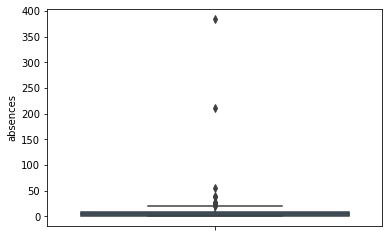

In [14]:
sns.boxplot(y='absences', data=students)

Так как данный столбец потенциально может оказывать сильное влияние, благоразумней исключить строки, содержащие значения 212 и 385

In [15]:
students = students[[False if x == 212 or x == 385 else True for x in students.absences]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  270 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


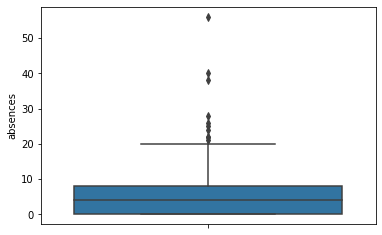

In [16]:
sns.boxplot(y='absences', data=students)
pd.DataFrame(students['absences']).info()

## Столбец 'address' - место жительства студента (за городом или в городе)

In [17]:
display(pd.DataFrame(students['address'].value_counts()))
display(students['address'].describe())

,address
U,206
R,55
no_data,9


count     270
unique      3
top         U
freq      206
Name: address, dtype: object

В выборке у 9 учеников из 270 не указан адрес. При этом 76% студентов - городские. Возможно заменить пропущенные значения на проживающих в городе.  

 Но, возможно, из времени в пути до школы можно понять, где проживает студент Для этого проверим корреляцию времени в дороге с местом жительства студентов.
Но сначала проанализиурем столбец traveltime

### Частота студентов по времени в пути в зависимости от места жительства для учеников из школы GP

Text(0, 0.5, 'Частота')

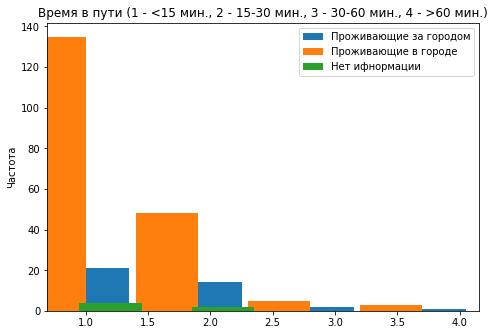

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
#axes.set_ylim(0, 60)
axes.hist(x=students[(students.address == 'R') & (students.school == 'GP')]['traveltime'],
          width=0.5, align='left', label='Проживающие за городом')
axes.hist(x=students[(students.address == 'U') & (students.school == 'GP')]['traveltime'],
          width=-0.5, align='mid', label='Проживающие в городе')
axes.hist(x=students[(students.address == 'no_data') & (students.school == 'GP')]['traveltime'],
          width=0.5, align='left', label='Нет ифнормации')
axes.legend(loc=1)
axes.set_title('Время в пути (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)')
axes.set_ylabel('Частота')

Безусловно, большее количество студентов, учащихся в GP и тратящих на дорогу менее 15 минут живут в городе. Но и абсолютное количество учеников живут в городе.  
Распределение учеников, тратящих на дорогу разные временные промежутки, схоже как для студентов, живующих за городом, так и для студентов, живующих в городе.

### Частота студентов по времени в пути в зависимости от места жительства для учеников из школы MS

Text(0, 0.5, 'Частота')

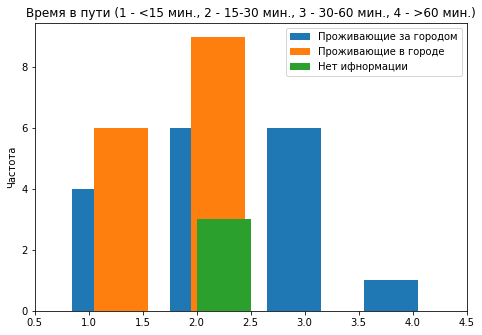

In [19]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlim(0.5, 4.5)
axes.hist(x=students[(students.address == 'R') & (students.school == 'MS')]['traveltime'],
          width=0.5, align='left', label='Проживающие за городом')
axes.hist(x=students[(students.address == 'U') & (students.school == 'MS')]['traveltime'],
          width=0.5, align='right', label='Проживающие в городе')
axes.hist(x=students[(students.address == 'no_data') & (students.school == 'MS')]['traveltime'],
          width=0.5, align='mid', label='Нет ифнормации')
axes.legend(loc=1)
axes.set_title('Время в пути (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)')
axes.set_ylabel('Частота')

Аналогично и для школы MS. Нельзя с уверенностью утверждать, где живут ученики, не указавшиеся данной информации. При изображении с помощью "коробочки и усов" очевидно, что время в пути не указывает однозначно для проживание за городом или в черте города однозначно ни в одной из школ.

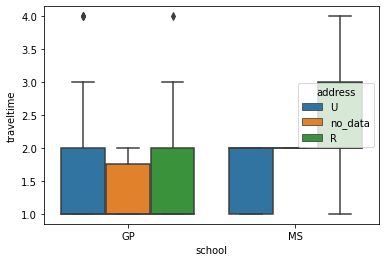

In [20]:
sns.boxplot(x='school', y='traveltime', hue='address', data=students)

## Столбец 'Pstatus' - проживают ли родители вместе

In [21]:
display(pd.DataFrame(students['Pstatus'].value_counts()))

,Pstatus
T,221
no_data,28
A,21


У 28 студентов не указано, проживают ли родители вместе. По моде можно заменить на T - живут вместе. Но, возможно, именно те, кто не указывал статус проживания родителей, имеют более сложные отношения в семье и имели бы статус A. На данный момент заменим все отсутствующие данными "no_data"

## Столбец Medu - образование матери и Fedu - образование отца

In [22]:
display(pd.DataFrame(students['Medu'].value_counts()))
display(pd.DataFrame(students['Fedu'].value_counts()))

,Medu
4.0,95
2.0,71
3.0,66
1.0,35
0.0,3


,Fedu
2.0,76
3.0,70
4.0,70
1.0,52
0.0,1
40.0,1


В данном наборе данных  об образовании отца  мы видим один выброс, который с доминирующей вероятностью исправляется удалением нуля.

In [23]:
students.Fedu = students.Fedu.apply(lambda x: 4 if x == 40 else x)

In [24]:
display(pd.DataFrame(students['Fedu'].value_counts()))

,Fedu
2.0,76
4.0,71
3.0,70
1.0,52
0.0,1


## Проверка на вхождение величин в заданный диапазон


In [25]:
display(pd.DataFrame(students['age'].value_counts()))
display(pd.DataFrame(students['Medu'].value_counts()))
display(pd.DataFrame(students['Fedu'].value_counts()))
display(pd.DataFrame(students['Mjob'].value_counts()))
display(pd.DataFrame(students['Fjob'].value_counts()))
display(pd.DataFrame(students['reason'].value_counts()))
display(pd.DataFrame(students['guardian'].value_counts()))
display(pd.DataFrame(students['traveltime'].value_counts()))
display(pd.DataFrame(students['studytime'].value_counts()))
display(pd.DataFrame(students['failures'].value_counts()))
display(pd.DataFrame(students['famrel'].value_counts()))
display(pd.DataFrame(students['freetime'].value_counts()))
display(pd.DataFrame(students['goout'].value_counts()))
display(pd.DataFrame(students['health'].value_counts()))

,age
16,75
17,65
18,59
15,52
19,15
20,2
22,1
21,1


,Medu
4.0,95
2.0,71
3.0,66
1.0,35
0.0,3


,Fedu
2.0,76
4.0,71
3.0,70
1.0,52
0.0,1


,Mjob
other,102
services,67
at_home,39
teacher,37
health,25


,Fjob
other,160
services,69
teacher,21
at_home,11
health,9


,reason
course,90
reputation,73
home,70
other,37


,guardian
mother,171
father,57
other,42


,traveltime
1.0,170
2.0,82
3.0,13
4.0,5


,studytime
2.0,129
1.0,78
3.0,45
4.0,18


,failures
0.0,214
1.0,35
3.0,12
2.0,9


,famrel
4.0,134
5.0,69
3.0,47
2.0,14
1.0,5
-1.0,1


,freetime
3.0,107
4.0,79
2.0,47
5.0,25
1.0,12


,goout
3.0,97
2.0,68
4.0,58
5.0,33
1.0,14


,health
5.0,86
3.0,67
4.0,48
1.0,35
2.0,34


В столбце famrel присутствует выброс -1. Он является либо следствием ошибочного написания минуса перед единицей, либо указывает на степень негатива при ответе на данный вопрос. В обоих случаях правомерна замена на единицу.

In [26]:
students.famrel = students.famrel.apply(lambda x: 1 if x == -1 else x)
display(pd.DataFrame(students['famrel'].value_counts()))

,famrel
4.0,134
5.0,69
3.0,47
2.0,14
1.0,6


## Предварительный анализ данных

Статистика результатов госэкзамена:

In [27]:
students.score.describe()

count    270.000000
mean      52.166667
std       22.106325
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

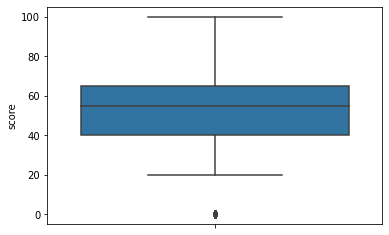

In [28]:
sns.boxplot(y='score', data=students)

### Количественные признаки

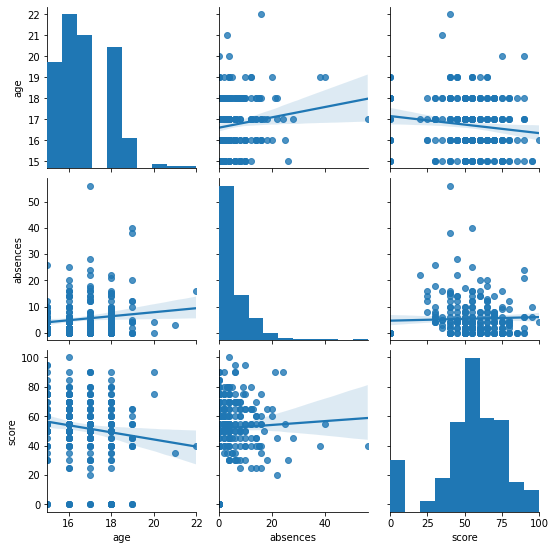

In [29]:
sns.pairplot(students[['age', 'absences', 'score']], kind='reg')

In [30]:
students[['age','absences','score']].corr()

,age,absences,score
age,1.000000,0.137474,-0.140335
absences,0.137474,1.000000,0.042339
score,-0.140335,0.042339,1.000000


Яного влияния не выялвено

### Категориальные признаки

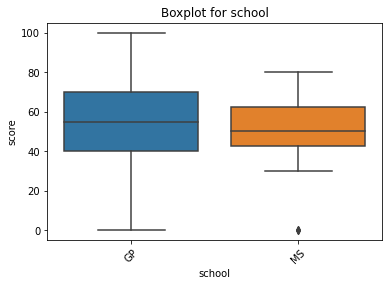

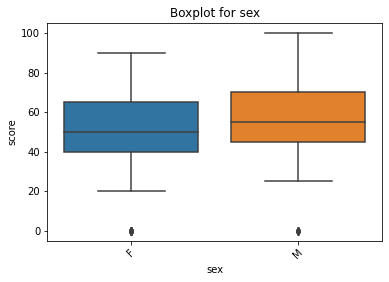

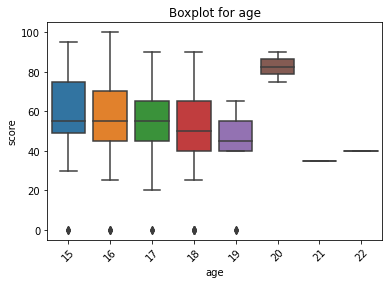

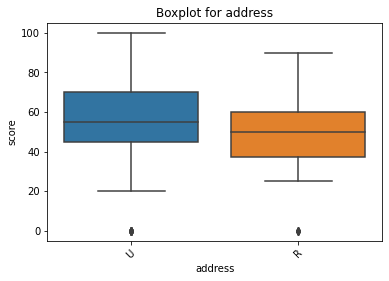

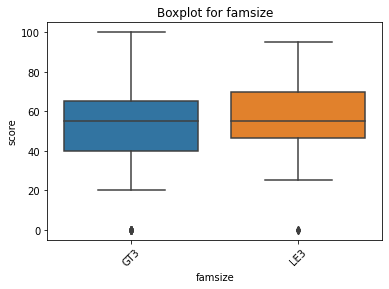

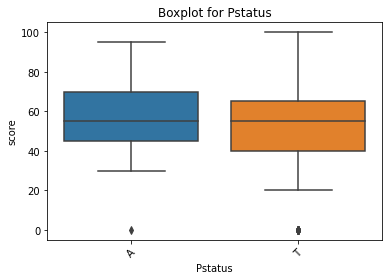

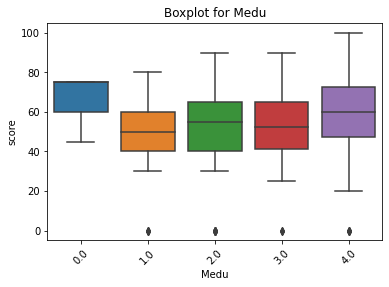

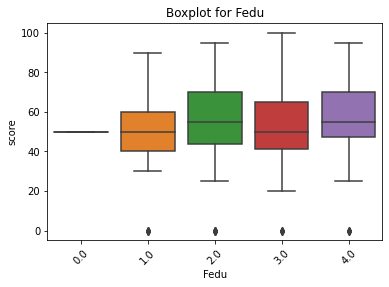

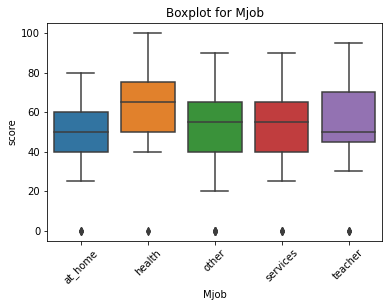

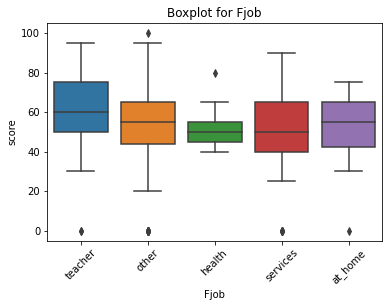

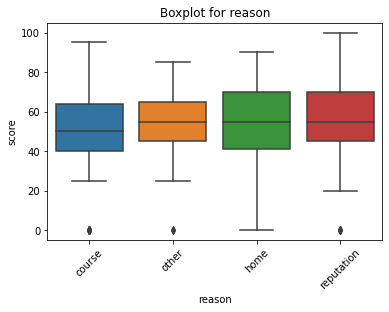

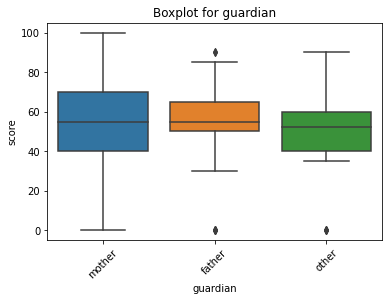

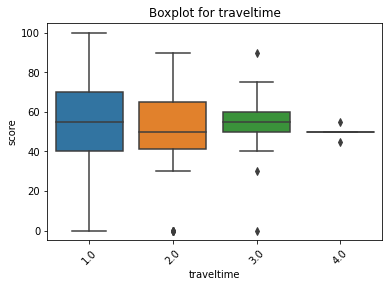

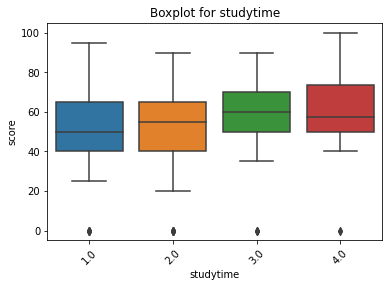

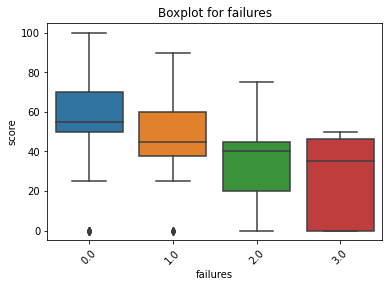

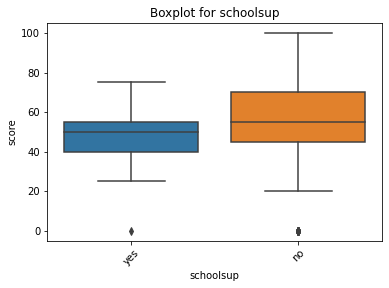

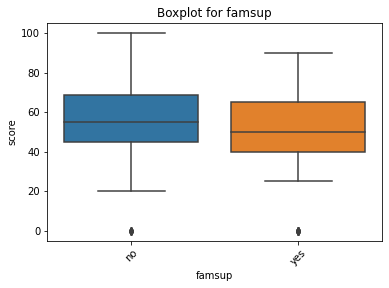

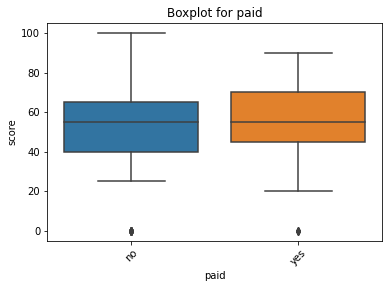

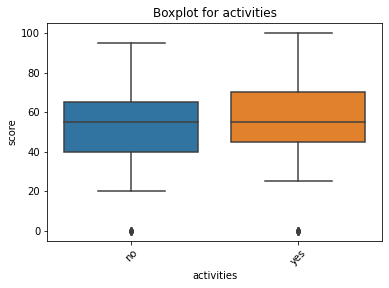

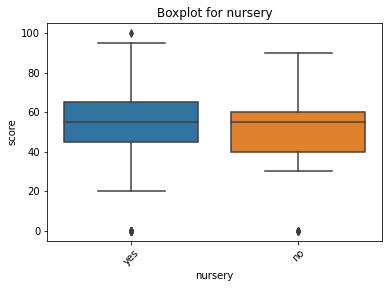

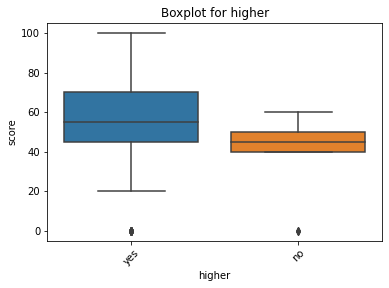

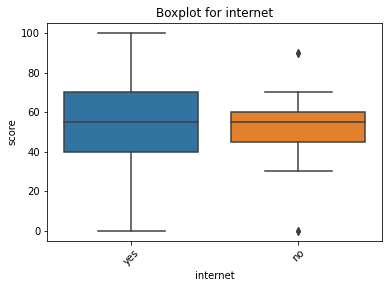

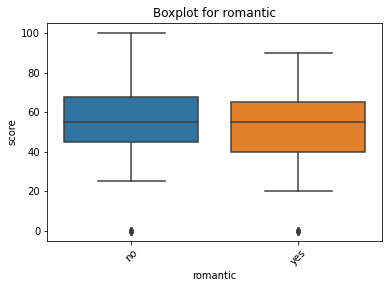

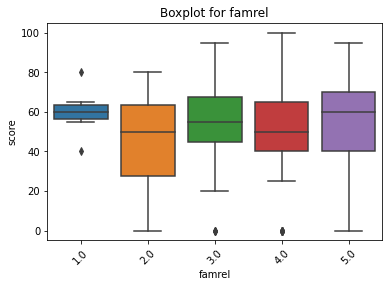

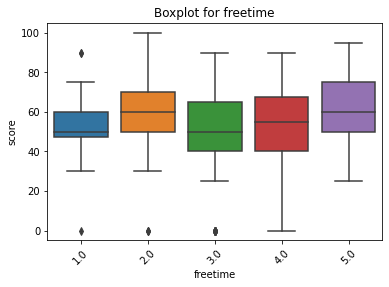

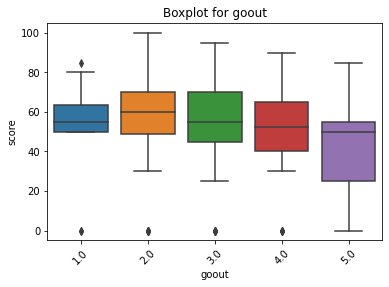

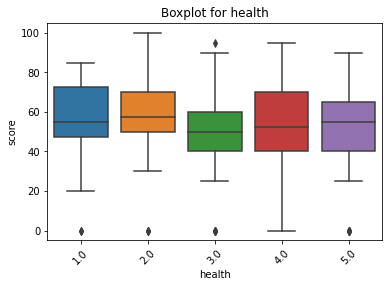

In [31]:
student_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
                   'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
                   'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']
for column in student_columns:
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score',
                data=students[[False if str(
                    x) == 'no_data' else True for x in students[column]]],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Проверим, есть ли величины, которые дают статистически неразличимые результаты при сепарации по школе.

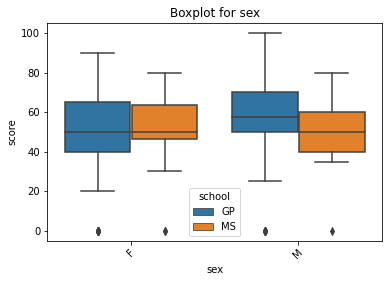

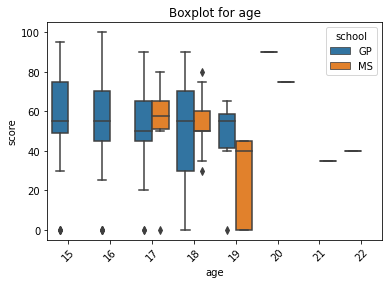

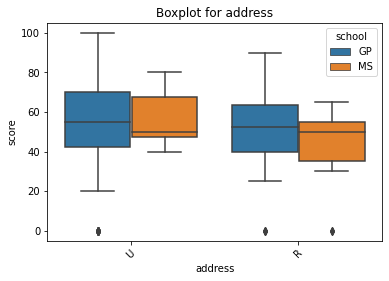

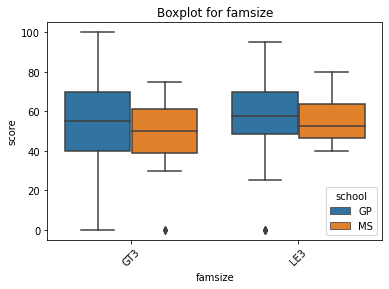

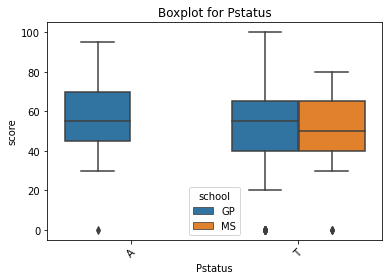

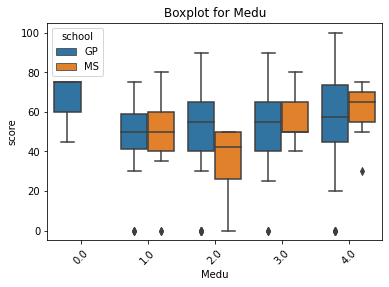

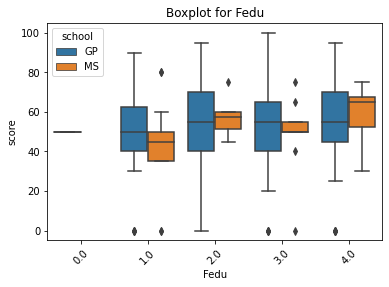

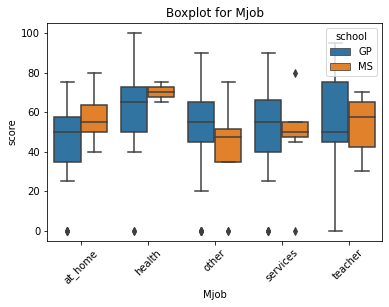

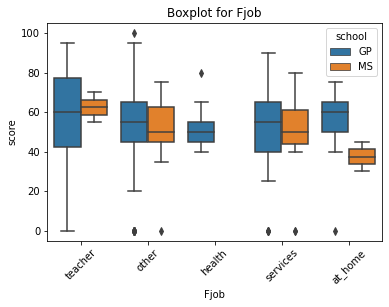

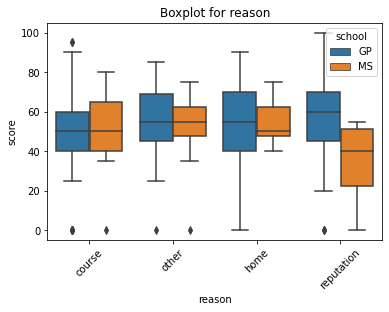

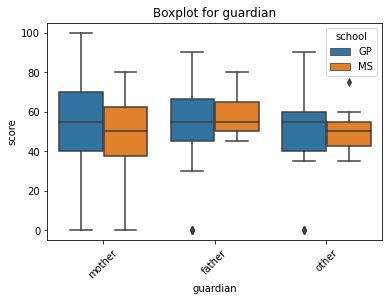

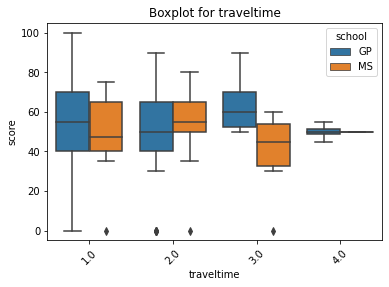

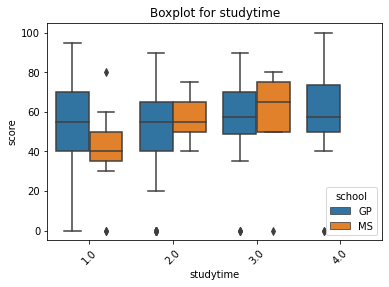

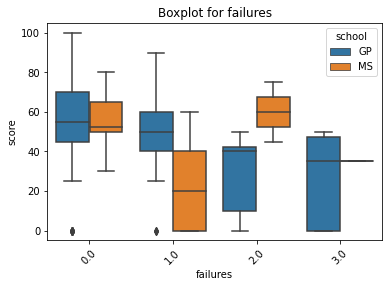

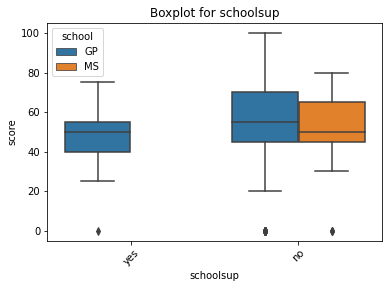

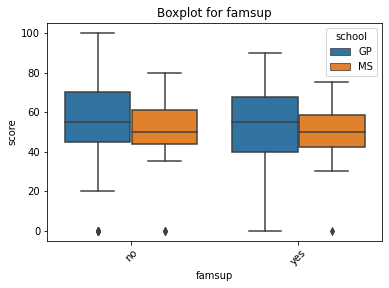

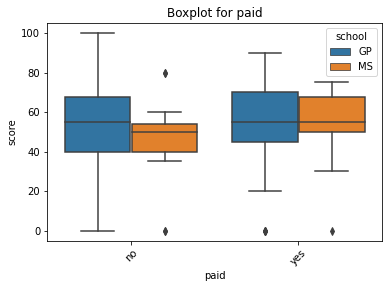

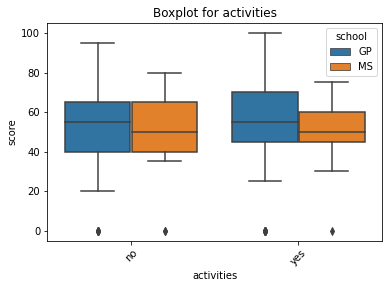

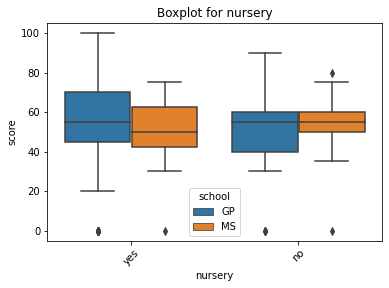

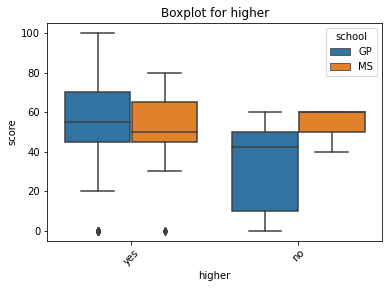

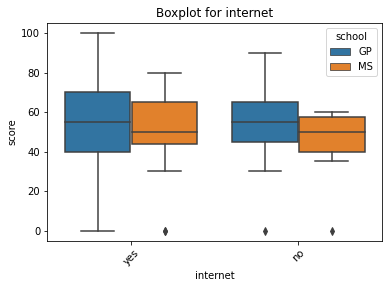

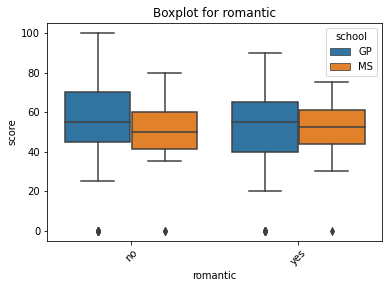

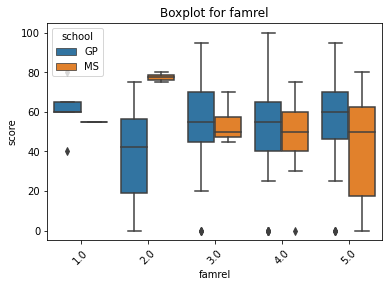

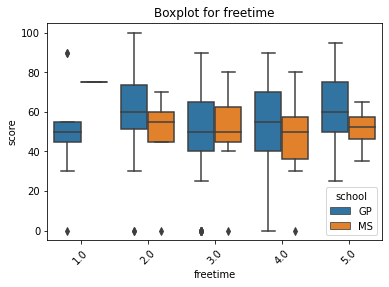

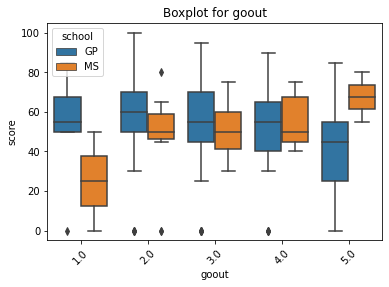

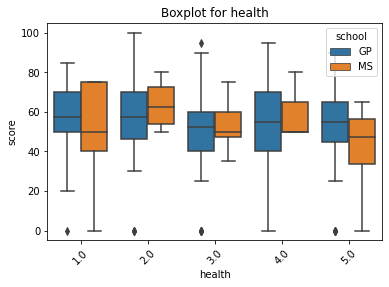

In [32]:
for column in student_columns[1:]:
    fig, ax = plt.subplots()
    sns.boxplot(x=column, y='score', hue='school',
                data=students[[False if str(x) == 'no_data' else True for x in students[column]]],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Зрительно в оставленных данных не наблюдается повторяющихся данных.
Наибольшее влияние по графикам оказывает величина failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

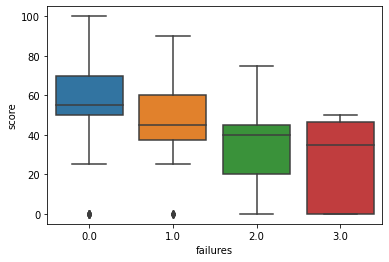

In [33]:
sns.boxplot(x='failures', y='score', data=students)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [34]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [35]:
for col in student_columns:
    get_stat_dif(col)

Тест Стьюдента показал, что статистически значимых различий в колонках нет.

## Заключение

Таким образом:
* Оставлено полностью заполненных 270 строк из 395. 
* Оценка за госэкзамен 52+-22, оценки лежат в основном в диапазоне от 40 до 65.
* В категориальных признаках (в которых категории не заменялись на числа) пропущенные данные заменены на 'no_data' или 'other', если такой ответ был одним из вариантов.
* Строки, в которых пропущены величины, относящиеся к категориальным признакам, но в которых категории заменялись на числа, удалены. 
* Исправлено две опечатки: в Fedu 40 на 4 и в famrel -1 на 1.
* Удалены две строчки с выбросами в absences: 385 и 212.
* Удален столбец "studytime, granular", описания которого нет. В данном столбце размещены числовые данные: -3, -6, -9, -12
* В столбце absences — количество пропущенных занятий 9 пропущенных значений заменено на модальное значение (моду): 0.
* Наибольшее влияние по графикам оказывает величина failures - количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
* В остальном ни зрительно не удается выявить факторы, оказывающие доминирующее и значимое влияние на результаты госэкзамена, так и тест Стьюдента не находит статистическую разницу в распределении оценок по номинативным признакам. Необходим дополнительный анализ с применением алгоритмов



### Комментарий для ментора
Как Вы и предупреждали, мне кажется, я "закопалась" в данных. Пытаясь вытащить единичные пропущенные значения, тратила очень много времени. При этом, глобально, что делать с величинами, которые пропущены и по которым нет информации, я была не уверена. Мне кажется, что замена пропущенных значений на моду окажет сильное влияние на статистические характеристики. В итоге, я много строк просто удалила. Четверть всего объема данных. Нормально ли это?
Я впервые встретилась с тестом Стьюдента, его реализацию не очень поняла. Я удивлена и растеряна от того, что он показал, что нет статистической разницы в распределении оценок по номинативным признакам.  
Также смутило, что зрительно оценить влияние параметров на оценку по госэкзамену мне не представилось возможным. Мне кажется, всё, что я сделала, это подготовила данные для дальнейшей работы. Но выводов я на данном этапе по этим данным я сделать не могу.